In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

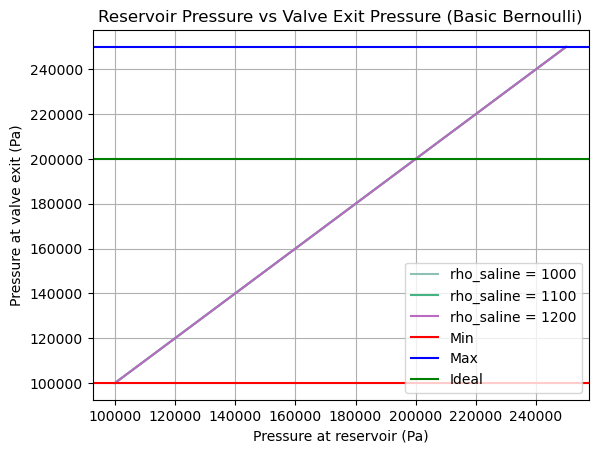

In [87]:
#Velocity at flesh

#Using Bernoulli
# P1 = P2 + 0.5 * rho * v_2^2
# v_2 = sqrt(...)

#Valve pressure at tube exit
p_exit = 80e3 #Pa
p_exit = np.linspace(100e3, 250e3, 100)

#Density of saline
rho_saline = 1100 #kg/m^3
v_flesh = np.sqrt(2*p_exit/rho_saline)

########################################################################################################

#Pressure at reservoir
# P1 = P2 + 0.5 * rho * v_2^2

p_atm = 101325 #atm
p_reservoir = p_atm + 0.5 * rho_saline * v_flesh**2
p_res_valve = p_reservoir - p_atm

#LIMITS
p_exit_min = 100e3
p_exit_max = 250e3
p_exit_ideal = 200e3

rho_saline_var = [1000,1100,1200]

for rho in rho_saline_var:
    v_flesh_var = np.sqrt(2*p_exit/rho)
    p_reservoir_var = p_atm + 0.5 * rho * v_flesh_var**2  
    p_res_valve_var = p_reservoir_var - p_atm
    plt.plot(p_res_valve_var, p_exit, label = 'rho_saline = '+str(rho), c=np.random.rand(3,))

plt.ylabel('Pressure at valve exit (Pa)')
plt.xlabel('Pressure at reservoir (Pa)')
plt.title('Reservoir Pressure vs Valve Exit Pressure (Basic Bernoulli)')
plt.axhline(y=p_exit_min, color='r', linestyle='-', label='Min')
plt.axhline(y=p_exit_max, color='blue', linestyle='-', label='Max')
plt.axhline(y=p_exit_ideal, color='g', linestyle='-', label='Ideal')
plt.legend()
plt.grid()


4163.739356709574
0.008736499956004942


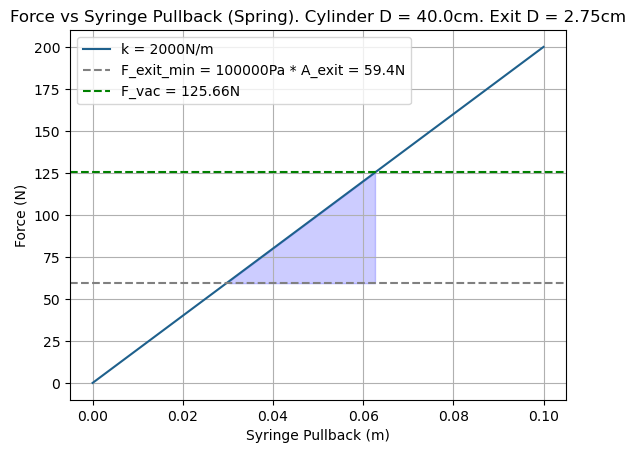

In [81]:
#Pressure needed at syringe exit

p_min = 100000
p_max = 200000


#Spring
k = 2000
x = np.linspace(0, 0.1, 100) #0.1 meter syringe pullback

#Syringe Details
r = 0.4/2 #m
A_cyl_body = np.pi * r**2 #m^2

#Exit conditions
r_exit = 0.0275/2 #m
A_exit = np.pi * r_exit**2 #m^2
f_min = p_min * A_exit
f_max = p_max * A_exit

#Vac pressure and force
p_vac = 1000 #Pa
f_vac = p_vac*A_cyl_body

#Volumetric flow rate conditions

x_min = f_min/k
x_max = f_vac/k

volume_displaced = A_cyl_body*(x_max-x_min)
print(str(volume_displaced*10**6))

#The total time can be calculated via conservation of energy
# That is, F_vac*deltaT = 1/2 * k * x^2 -> deltaT = ...

deltaT = (0.5*k*(x_max-x_min)**2)/f_vac
print(str(deltaT))

#Plot

fig, ax = plt.subplots()



F_spring = k * x
ax.plot(x, F_spring, label='k = '+str(k)+'N/m',c=np.random.rand(3,))
ax.fill_between(x, f_min, F_spring,(F_spring>f_min)&(F_spring<=f_vac), color='blue', alpha=.2)
ax.axhline(y=f_min, color='grey', linestyle='--', label='F_exit_min = '+str(p_min)+'Pa * A_exit'+' = '+str(round(f_min,2))+'N')
#ax.axhline(y=f_max, color='black', linestyle='--', label='F_exit_max = '+str(p_max)+'Pa * A_exit' +' = '+str(round(f_max,2))+'N')
ax.axhline(y=f_vac, color='green', linestyle='--', label='F_vac = '+str(round(f_vac,2))+'N')
plt.xlabel('Syringe Pullback (m)')
plt.ylabel('Force (N)')
plt.title('Force vs Syringe Pullback (Spring). Cylinder D = '+str(round(r*2*100,2))+'cm. Exit D = '+str(round(2*r_exit*100,2))+'cm')
plt.legend()
ax.grid()
plt.show()




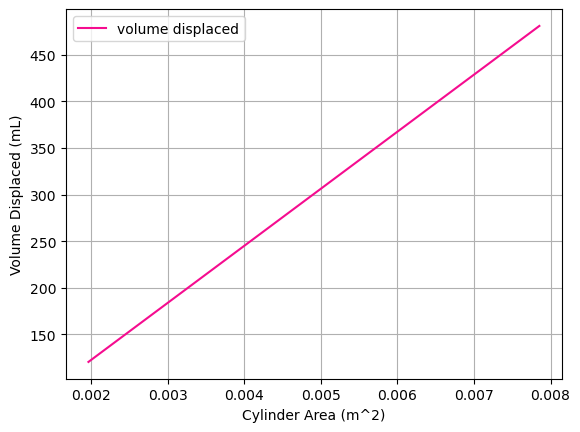

In [11]:
#Pressure needed at syringe exit

p_min = 5500
p_max = 7000


#Spring
k = 100
x = np.linspace(0, 0.1, 100) #0.1 meter syringe pullback

#Syringe Details
r = np.linspace(0.05, 0.1, 100)/2 #m
A_cyl_body = np.pi * r**2 #m^2

#Exit conditions
r_exit = 0.02/2 #m
A_exit = np.pi * r_exit**2 #m^2
f_min = p_min * A_exit
f_max = p_max * A_exit

x_min = f_min/k
x_max = f_vac/k


#Vac pressure and force

p_vac = 1000 #Pa
f_vac = p_vac*A_cyl_body

#Volumetric flow rate conditions

fig, ax = plt.subplots()
volume_displaced = A_cyl_body*(x_max-x_min)*10**6 #mL
ax.plot(A_cyl_body, volume_displaced, label = 'volume displaced', c=np.random.rand(3,))
plt.xlabel('Cylinder Area (m^2)')
plt.ylabel('Volume Displaced (mL)')
#plt.title('Force vs Syringe Pullback (Spring). Cylinder Area = '+str(round(A_cyl_body*100,2))+'cm^2. Exit Area = '+str(round(A_exit*100,2))+'cm^2')
plt.legend()
ax.grid()
plt.show()

#The total time can be calculated via conservation of energy
# That is, F_vac*deltaT = 1/2 * k * x^2 -> deltaT = ...

deltaT = (0.5*k*(x_max-x_min)**2)/f_vac

1.6964600329384882


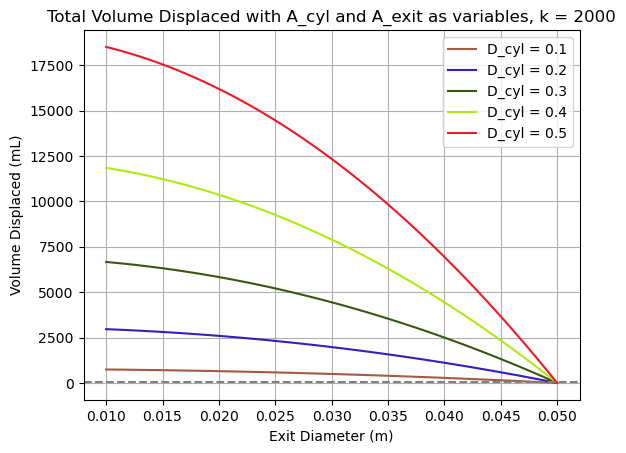

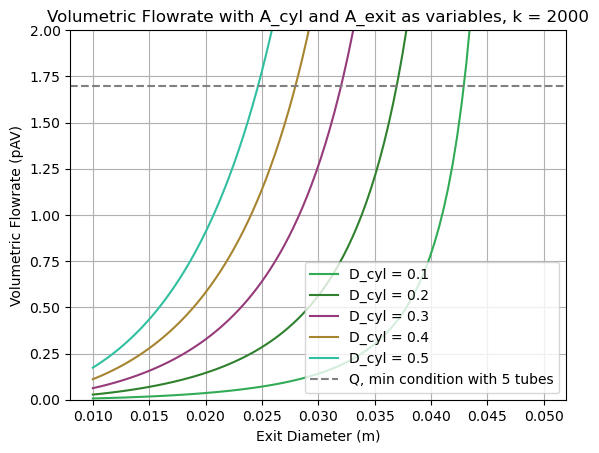

In [73]:
#Pressure needed at syringe exit

p_min = 100000
p_max = 100000


#Spring
k = 2000
x = np.linspace(0, 0.1, 100) #0.1 meter syringe pullback

#Syringe Details
r = np.linspace(0.1,0.5,5)/2 #m
A_cyl_body = np.pi * r**2 #m^2

#Exit conditions
r_exit = np.linspace(0.01,0.05,100)/2 #m
A_exit = np.pi * r_exit**2 #m^2
f_min = p_min * A_exit
f_max = p_max * A_exit

x_min = f_min/k
x_max = f_vac/k


#Vac pressure and force

p_vac = 1000 #Pa

rho_saline = 1000

v_flesh = 12
n_tubes = 5
Q_min = v_flesh * np.pi * 0.003**2 * rho_saline * 5



fig, ax = plt.subplots()
fig, ax2 = plt.subplots()
for A_cyl_body in A_cyl_body:

    f_vac = p_vac*A_cyl_body
    #Volumetric flow rate conditions
    #The total time can be calculated via conservation of energy
    # That is, F_vac*deltaT = 1/2 * k * x^2 -> deltaT = ...
    deltaT = (0.5*k*(x_max-x_min)**2)/f_vac
    v_ave = max(x)/(deltaT)
    Q = v_ave*A_exit*rho_saline
    ax2.plot(2*np.sqrt(A_exit/np.pi), Q,label = 'D_cyl = '+str(round(2*np.sqrt(A_cyl_body/np.pi),3)), c=np.random.rand(3,))
    
    volume_displaced = A_cyl_body*(x_max-x_min)*10**6 #mL
    ax.plot(2*np.sqrt(A_exit/np.pi), volume_displaced, label = 'D_cyl = '+str(2*round(np.sqrt(A_cyl_body/np.pi),3)), c=np.random.rand(3,))
    ax.legend()
    

ax.set_xlabel('Exit Diameter (m)')
ax.set_ylabel('Volume Displaced (mL)')
ax.axhline(y=50, color='grey', linestyle='--', label='50mL, min condition')
ax.set_title('Total Volume Displaced with A_cyl and A_exit as variables, k = '+str(k))


ax.grid()


ax2.set_xlabel('Exit Diameter (m)')
ax2.set_ylabel('Volumetric Flowrate (pAV)')
ax2.axhline(y=Q_min, color='grey', linestyle='--', label='Q, min condition with ' + str(n_tubes) + ' tubes')
print(Q_min)
ax2.set_title('Volumetric Flowrate with A_cyl and A_exit as variables, k = '+str(k))
ax2.grid()
ax2.set_ylim(0,2)
ax2.legend(loc='lower right')

# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


plt.show()
